# Decision Tree Classification: A Complete Guide

In this notebook, we will implement Decision Tree Classification from scratch and explain each step in detail.

---

## Introduction

A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It works by splitting the data into subsets based on the feature values that lead to the best possible separation between the classes (or continuous values for regression).

Key terms:
- **Root Node**: The top node representing the entire dataset.
- **Leaf Nodes**: Final decision outcomes (i.e., predicted class labels).
- **Branches**: Conditions applied to the features leading to outcomes.

In this notebook, we’ll implement a **Decision Tree Classifier**.

---

## 1. Importing Required Libraries

We'll start by importing the necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, classification_report, roc_curve, auc

## 2. Creating a Synthetic Dataset 

* We’ll generate a simple dataset for binary classification.

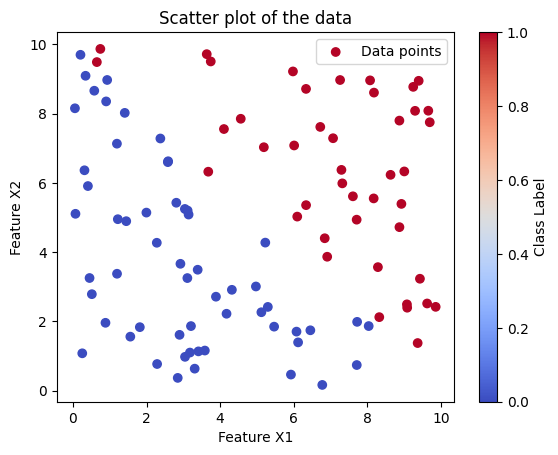

In [3]:
# Generate synthetic data for binary classification
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # 100 points, 2 features between 0 and 10
y = (X[:, 0] + X[:, 1] > 10).astype(int)  # Class 1 if sum of features > 10, otherwise class 0

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", label="Data points")
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.title("Scatter plot of the data")
plt.colorbar(label='Class Label')
plt.legend()
plt.show()

## 3. Splitting the Data into Training and Testing Sets

* Next, we split the data into training and testing sets.

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Training the Decision Tree Classifier

* We will now create and train the Decision Tree Classifier.

In [5]:
# Create a decision tree classifier
decision_tree = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the classifier
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## 5. Visualizing the Decision Tree 

* One of the great things about Decision Trees is their interpretability. We can visualize the tree to see how the decisions are being made.

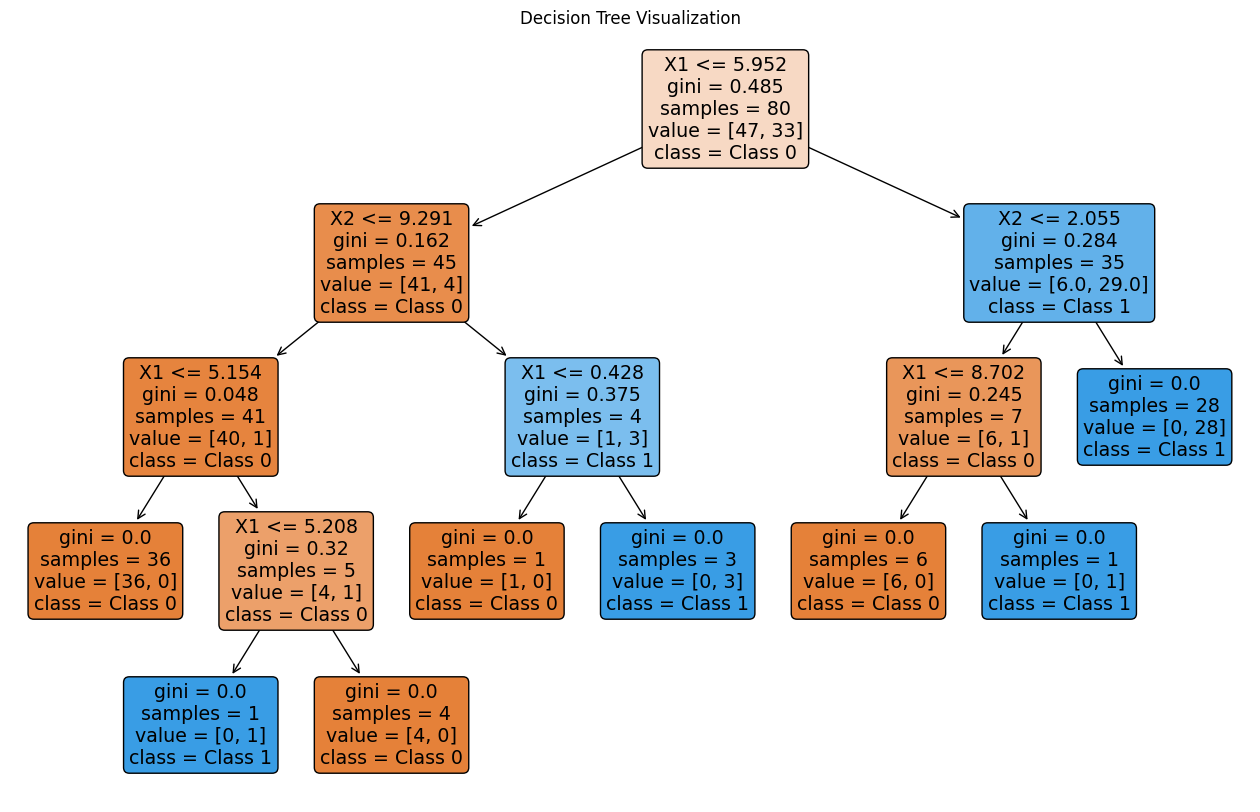

In [6]:
# Plot the decision tree
plt.figure(figsize=(16, 10))
plot_tree(decision_tree, filled=True, feature_names=["X1", "X2"], class_names=["Class 0", "Class 1"], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

## 6. Making Predictions

* Now we will use the trained model to make predictions on the test set.

In [7]:
# Predict on the test set
y_pred = decision_tree.predict(X_test)

## 7. Evaluating the Model 

### 7.1 Accuracy Score 

* We start by calculating the accuracy of the model.

In [8]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


### 7.2 Confusion Matrix and Classification Report

* To get a detailed performance breakdown, we will generate the confusion matrix and classification report.

<Figure size 800x600 with 0 Axes>

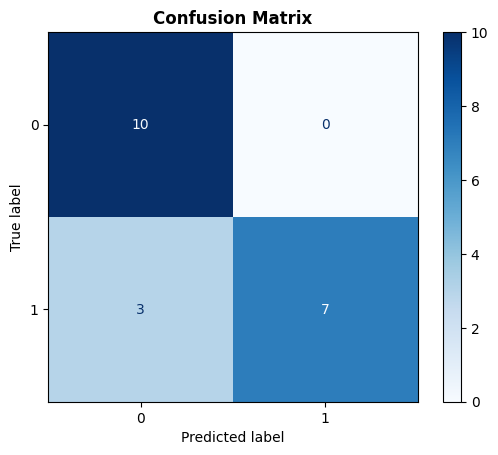

Classification Report:

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20



In [9]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=decision_tree.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.title('Confusion Matrix', fontweight='bold')
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print()
print(class_report)

### 7.3 ROC Curve and AUC 

* We'll also compute and plot the ROC curve and calculate the AUC score.

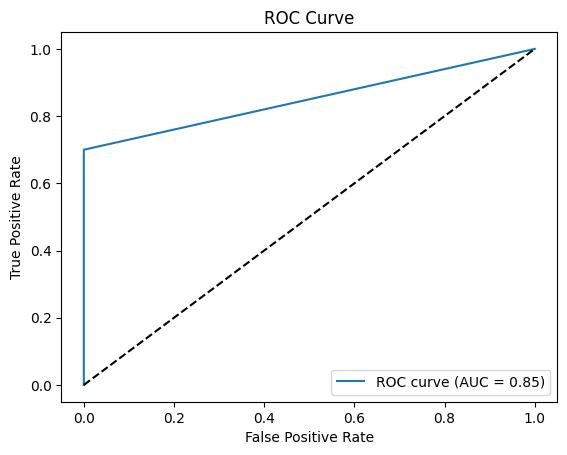

In [10]:
# Predict probabilities for ROC curve
y_pred_prob = decision_tree.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 8. Visualizing Decision Boundaries 

* Finally, let’s visualize how the Decision Tree classifier separates the two classes in our dataset.

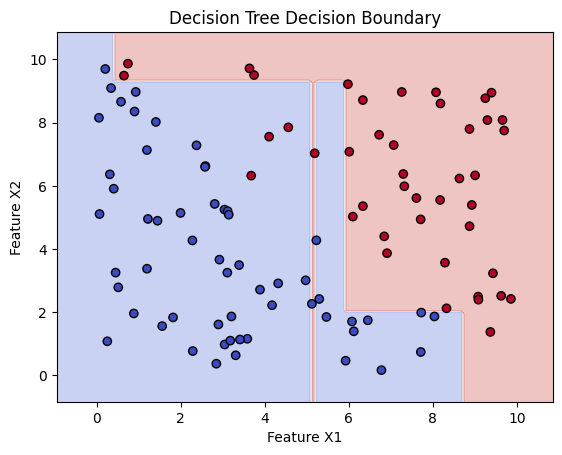

In [11]:
# Create a grid of values for X1 and X2 to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict class labels for the grid
Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap="coolwarm")
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.title("Decision Tree Decision Boundary")
plt.show()

## 9. Conclusion 

In this notebook, we implemented a Decision Tree Classifier and explored various steps:

	•	Data generation and visualization.
	•	Model training and prediction.
	•	Model evaluation using accuracy, confusion matrix, and ROC curve.
	•	Visualizing the decision tree and decision boundaries.

**Decision Trees are a powerful and interpretable classification tool, especially in cases where we need clear explanations for the model’s decisions.**